In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

In [3]:
print(wego)

        CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID        DATE  ROUTE_ABBR  \
0         120230801             1      99457890  2023-08-01          22   
1         120230801             1      99457891  2023-08-01          22   
2         120230801             1      99457892  2023-08-01          22   
3         120230801             1      99457893  2023-08-01          22   
4         120230801             1      99457894  2023-08-01          22   
...             ...           ...           ...         ...         ...   
350324    120230930             2     100406610  2023-09-30           7   
350325    120230930             2     100406611  2023-09-30           7   
350326    120230930             2     100406612  2023-09-30           7   
350327    120230930             2     100406613  2023-09-30           7   
350328    120230930             2     100406614  2023-09-30           7   

        BLOCK_ABBR  OPERATOR  TRIP_ID  OVERLOAD_ID ROUTE_DIRECTION_NAME  ...  \
0             2200 

In [9]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [11]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

# 1: What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [12]:
x = wego['ADJUSTED_ONTIME_COUNT'].mean()
print(format(x,'.2%'))

77.08%


In [13]:
wego['ADJUSTED_ONTIME_COUNT'].sum()

270048

<Axes: >

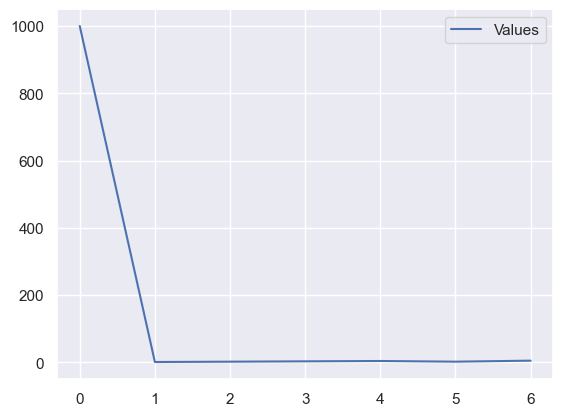

In [22]:
df = pd.DataFrame({'Values': [1000, 1, 2, 3 , 4 , 2, 5]})
df.plot()

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


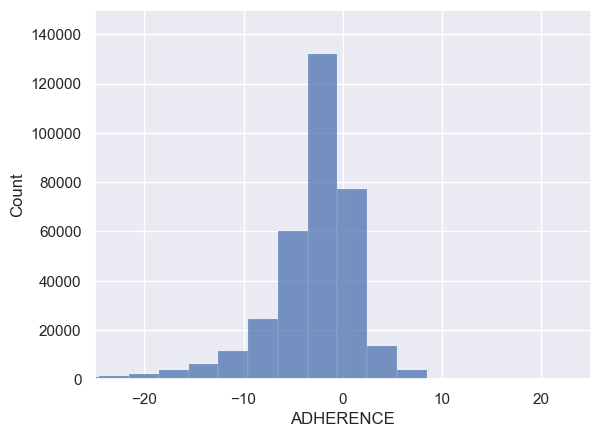

In [19]:
sns.set_theme(style="darkgrid")
sns.histplot(data=wego, x="ADHERENCE", binwidth=3)
plt.ylim(0, 150000)
plt.xlim(-25, 25)
plt.show()

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-30.0, 30.0)

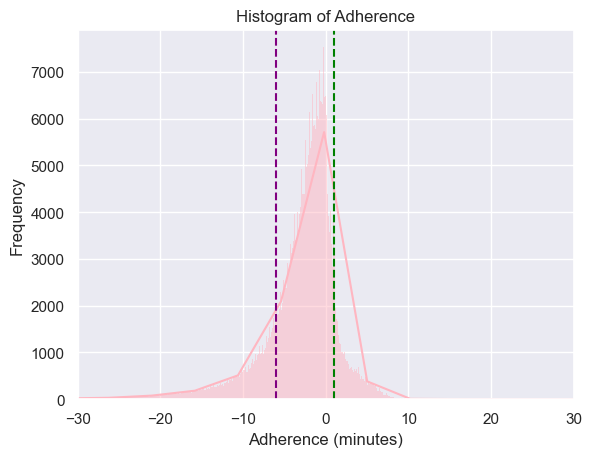

In [21]:
sns.histplot(wego['ADHERENCE'], kde=True, color='lightpink')
plt.title('Histogram of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=-6, color='purple', linestyle='--', label='Late Threshold (-6 min)')  # Adding a line indicating late threshold
plt.axvline(x=1, color='green', linestyle='--', label='Early Threshold (1 min)')  # Addin a line indicating early threshold
plt.xlim(left=-30, right=30)